IMPORTING THE LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import joblib
from sklearn.preprocessing import LabelEncoder

import pickle
%matplotlib inline

READING THE FILE

In [2]:
df = pd.read_csv("labelled_final_data.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)

SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [3]:
Y = df.iloc[:,0].values
X = df.iloc[:,1:].values
Y=Y.reshape(-1,1)

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

In [6]:
def find_scores(y_test, y_pred, X_train):
    scores = dict()
    mae = MAE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_test, y_pred)
    n, k = X_train.shape
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    scores['Mean Absolute Error']=mae
    scores['Mean Squared Error']=mse
    scores['Root Mean Squared Error']=rmse
    scores['Root Mean Squared Logaritmic Error ']=rmsle
    scores['r2_score']=r2
    scores['adj_r2_score']=adj_r2_score
    
    return scores

IMPORTING THE XGB REGRESSOR AND RANDOM FOREST REGRESSOR METHODS 

In [14]:
xgb_filename = 'final_xgb_model.sav'

#pickle.dump(xgb_model, open(xgb_filename, 'wb'))

loaded_xgb_model = pickle.load(open(xgb_filename,'rb'))


[23:20:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [20]:
loaded_xgb_model=pickle.load(open(file_name, "rb"))

NameError: name 'file_name' is not defined

In [21]:
loaded_model = joblib.load('xgb_final.sav')

In [23]:
xgb_pred = loaded_model.predict(x_test)

In [24]:
find_scores(y_test, xgb_pred, X_train)

{'Mean Absolute Error': 1350.6691992593705,
 'Mean Squared Error': 8428897.222035887,
 'Root Mean Squared Error': 2903.2563135272585,
 'Root Mean Squared Logaritmic Error ': 7.9735882527647695,
 'r2_score': 0.8831045298604734,
 'adj_r2_score': 0.8830974717650774}

In [25]:
rf_filename = 'final_rf_model.sav'

# pickle.dump(rf_model, open(rf_filename, 'wb'))

loaded_rf_model = pickle.load(open(rf_filename,'rb'))

In [26]:
loaded_rf_model.fit(X_train, Y_train)

ValueError: Invalid parameter 'min_impurity_split' for estimator DecisionTreeRegressor(criterion='mse', max_features='auto'). Valid parameters are: ['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [27]:
rf_pred = loaded_rf_model.predict(x_test)

In [28]:
find_scores(y_test, rf_pred, X_train)

ValueError: Input contains NaN.

Finalized Model :  xgboost Regressor

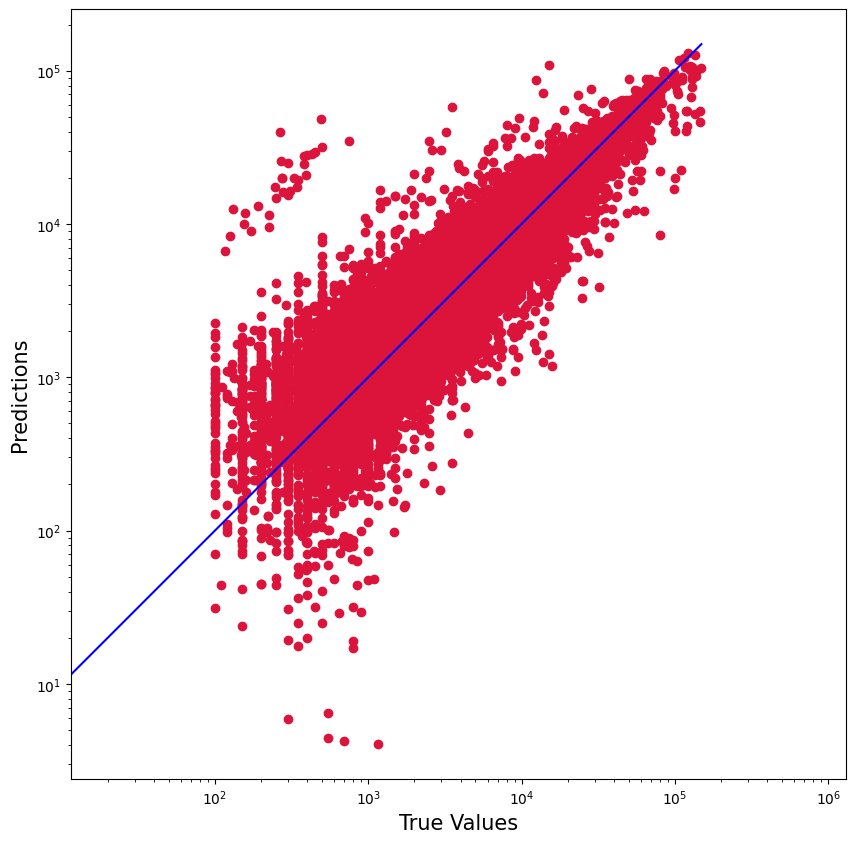

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, xgb_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(xgb_pred), max(y_test))
p2 = min(min(xgb_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()